<a href="https://colab.research.google.com/github/olhaishchenko/-data_science/blob/master/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Частина третя: Аналіз датасет c Kaggle.com**
У цій частині домашньої роботи ми ще більше заглибимося в бібліотеку pandas та розглянемо просунутіші функції.

Для цієї вправи ми використовуємо дані за Топ-50 рейтингом книг, що найбільше продаються на Amazon за 11 років (з 2009 по 2019).



Прочитайте csv файл (використовуйте функцію read_csv)

Виведіть перші п'ять рядків (використовується функція head)

Виведіть розміри датасету (використовуйте атрибут shape)

In [10]:
import pandas as pd
import seaborn as sns
df_books = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bestsellers with categories.csv")
df_books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [11]:
print(df_books.shape[0], df_books.shape[1])

550 7


**Про скільки книг зберігає дані датасет?**
**Відповідь**: 550

In [12]:
df_books.shape[0]

550

Для спрощення подальшої роботи давайте трохи підправимо назви змінних.

In [13]:
df_books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']



Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

**Чи є в якихось змінних пропуски?**
**Відповідь**:  ні



In [14]:
df_books.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

**Які є унікальні жанри?**
**Відповідь**: 'Non Fiction', 'Fiction'

In [15]:
df_books["genre"].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

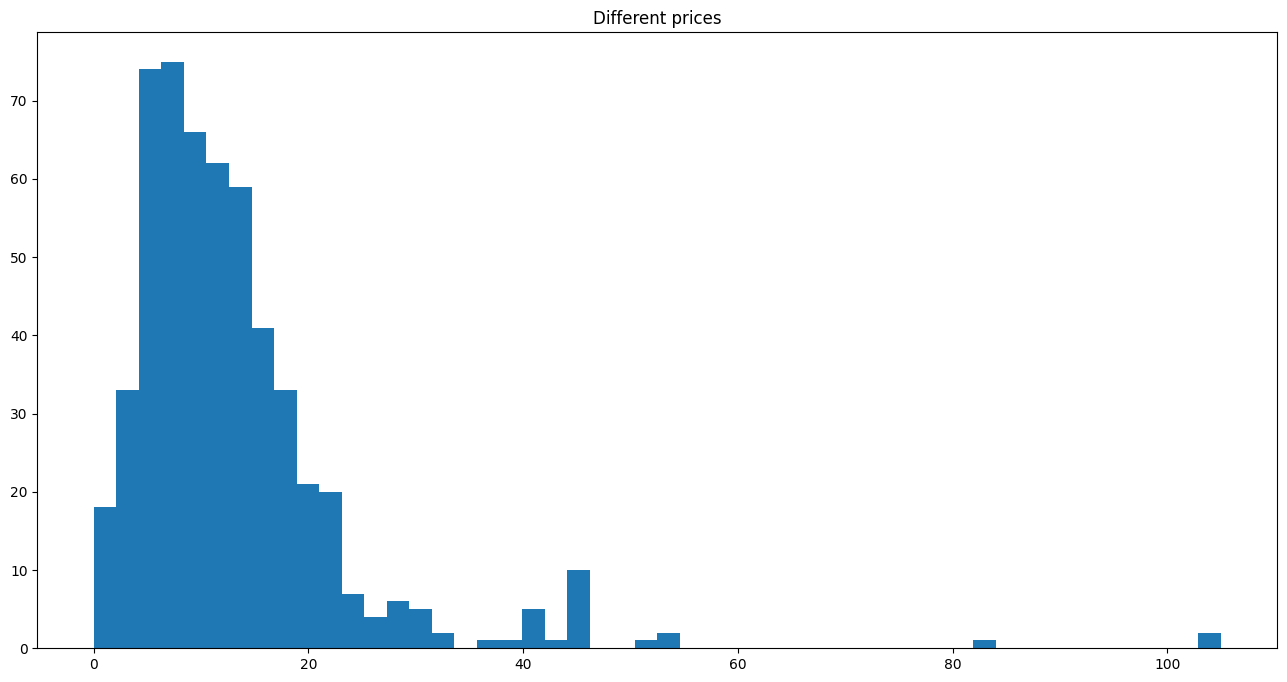

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.hist(df_books['price'], bins=50)
plt.title('Different prices');

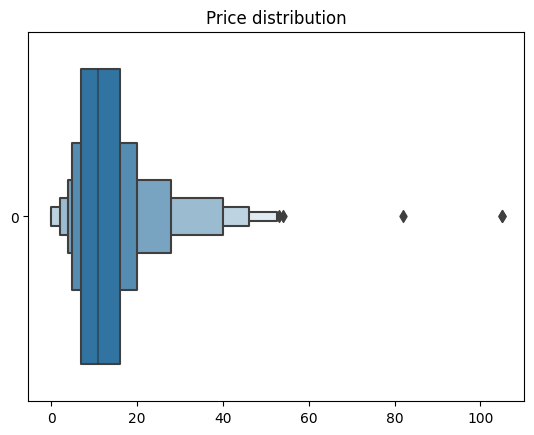

In [17]:
sns.boxenplot(data=df_books['price'], orient="h")
plt.title('Price distribution');

**Максимальна ціна?**

**Відповідь**: 105

In [18]:
df_books['price'].max()

105

**Мінімальна ціна?**

**Відповідь**: 0

In [19]:
df_books['price'].min()

0

**Середня ціна?**

**Відповідь**: 13.1

In [20]:
df_books['price'].mean()

13.1

**Медіанна ціна?**

**Відповідь**: 11.0

In [21]:
df_books['price'].median()

11.0

### **Пошук та сортування даних**

**Який рейтинг у датасеті найвищий?**

**Відповідь**: 4.9

In [22]:
df_books['user_rating'].max()

4.9

**Скільки книг мають такий рейтинг?**

**Відповідь**: 52

In [23]:
df_books[df_books['user_rating'] == df_books['user_rating'].max()].shape[0]


52

**Яка книга має найбільше відгуків?**

**Відповідь**: Where the Crawdads Sing

In [24]:
df_books.loc[df_books['reviews'].idxmax(), 'name']

'Where the Crawdads Sing'

**З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча** (можна використати проміжний датафрейм)?

**Відповідь**:Publication Manual of the American Psychological Association, 6th Edition

In [25]:
df_books_2015 = df_books[df_books['year'] == 2015]
df_books_2015.loc[df_books_2015['price'].idxmax(), 'name']

'Publication Manual of the American Psychological Association, 6th Edition'

**Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році** (використовуйте &)?

**Відповідь**: 20

In [26]:
df_books_2010_fiction = df_books[(df_books['year'] == 2010) & (df_books['genre'] == 'Fiction')]
df_books_2010_fiction.shape[0]

20

**Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках** (використовуйте | або функцію isin)?

**Відповідь**: 1

In [27]:
df_books_2010_2011 = df_books[(df_books['user_rating'] == 4.9) & ((df_books['year'] == 2010) | (df_books['year'] == 2011))]
df_books_2010_2011.shape[0]

1

давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

**Яка книга остання у відсортованому списку?**

**Відповідь**: Old School (Diary of a Wimpy Kid #10)

In [28]:
df_books_2015_price8 = df_books_2015[df_books_2015['price']<8]
df_sorted = df_books_2015_price8.sort_values(by='price')
last_book = df_sorted['name'].iloc[-1]
last_book

'Old School (Diary of a Wimpy Kid #10)'

### **Агрегування даних та з'єднання таблиць**

Остання секція цього домашнього завдання включає просунутіші функції. Але не хвилюйтеся, pandas робить усі операції простими та зрозумілими.

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

**Максимальна ціна для жанру Fiction.** **Відповідь**: 82

**Мінімальна ціна для жанру Fiction.** **Відповідь**: 0

**Максимальна ціна для жанру Non Fiction.** **Відповідь**: 105

**Мінімальна ціна для жанру Non Fiction.** **Відповідь**: 0

In [29]:
df_books_fiction = df_books[df_books['genre'] == 'Fiction']
print('Максимальна ціна для жанру Fiction:', df_books_fiction['price'].max())
print('Мінімальна ціна для жанру Fiction: ', df_books_fiction['price'].min())

Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction:  0


In [30]:
df_books_non_fiction = df_books[df_books['genre'] == 'Non Fiction']
print('Максимальна ціна для жанру Non Fiction:', df_books_non_fiction['price'].max())
print('Мінімальна ціна для жанру Non Fiction: ', df_books_non_fiction['price'].min())

Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction:  0


In [31]:
grouped_prices = df_books.groupby('genre')['price'].agg(['max', 'min'])
fiction_max_price = grouped_prices.loc['Fiction', 'max']
fiction_min_price = grouped_prices.loc['Fiction', 'min']
non_fiction_max_price = grouped_prices.loc['Non Fiction', 'max']
non_fiction_min_price = grouped_prices.loc['Non Fiction', 'min']
print('Максимальна ціна для жанру Fiction:', fiction_max_price)
print('Мінімальна ціна для жанру Fiction: ', fiction_min_price)
print('Максимальна ціна для жанру Non Fiction:', non_fiction_max_price)
print('Мінімальна ціна для жанру Non Fiction: ', non_fiction_min_price)

Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction:  0
Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction:  0


Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

**Якої розмірності вийшла таблиця?** **Відповідь**: (248,2)

**Який автор має найбільше книг?** **Відповідь**: Jeff Kinney

**Скільки книг цього автора?** **Відповідь**: 12

In [32]:
author_book_counts = df_books.groupby('author')['name'].agg('count')
author_book_counts = author_book_counts.reset_index()
author_book_counts.columns = ['author', 'book_count']
print('Якої розмірності вийшла таблиця:', author_book_counts.shape)
print('Який автор має найбільше книг:', author_book_counts['author'].iloc[author_book_counts['book_count'].idxmax()])
print('Скільки книг цього автора:', author_book_counts['book_count'].max())


Якої розмірності вийшла таблиця: (248, 2)
Який автор має найбільше книг: Jeff Kinney
Скільки книг цього автора: 12


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

**У якого автора середній рейтинг мінімальний?** **Відповідь**: Donna Tartt

**Який у цього автора середній рейтинг?** **Відповідь**: 3.9

In [33]:
author_book_rating = df_books.groupby('author')['user_rating'].agg('mean')
author_book_rating = author_book_rating.reset_index()
author_book_rating.columns = ['author', 'avg_rating']
print('У якого автора середній рейтинг мінімальний: ', author_book_rating['author'].iloc[author_book_rating['avg_rating'].idxmin()])
print('Який у цього автора середній рейтинг: ', author_book_rating['avg_rating'].min())

У якого автора середній рейтинг мінімальний:  Donna Tartt
Який у цього автора середній рейтинг:  3.9


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [34]:
author_count_raiting = pd.concat([author_book_counts, author_book_rating['avg_rating']], axis=1)
print(author_count_raiting.head())


                       author  book_count  avg_rating
0            Abraham Verghese           2         4.6
1              Adam Gasiewski           1         4.4
2               Adam Mansbach           1         4.8
3                   Adir Levy           1         4.8
4  Admiral William H. McRaven           1         4.7


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

**Який автор перший у списку?** **Відповідь**: Muriel Barbery

In [35]:
sorted_author = author_count_raiting.sort_values(by=['book_count','avg_rating'])
sorted_author['author'].iloc[0]


'Muriel Barbery'

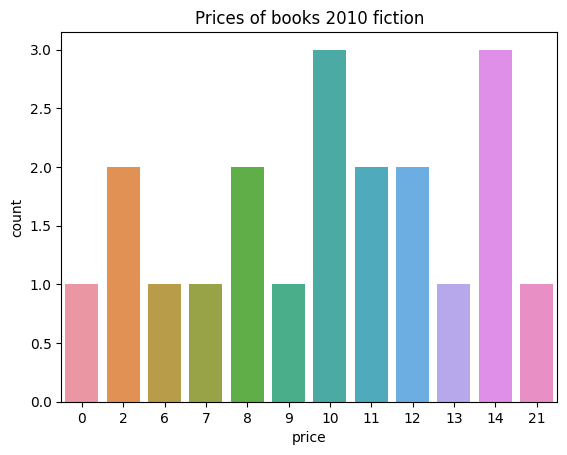

In [36]:
# author_book = df_books[df_books['year'] == '2010']
# author_book
sns.countplot(x="price", data=df_books_2010_fiction)
plt.title('Prices of books 2010 fiction');

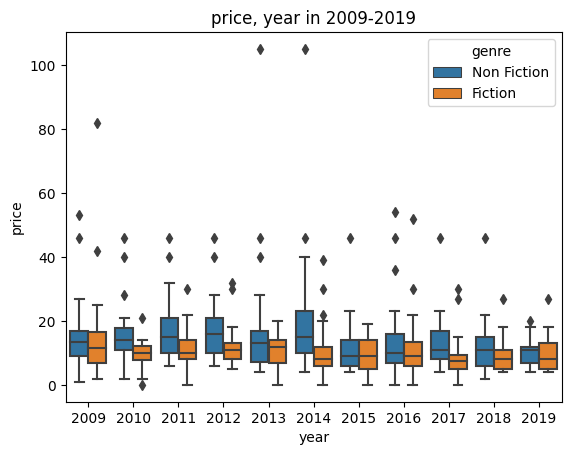

In [37]:
sns.boxplot(y="price", x="year", hue="genre", data=df_books)
plt.title('price, year in 2009-2019');

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 133 (\x85) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


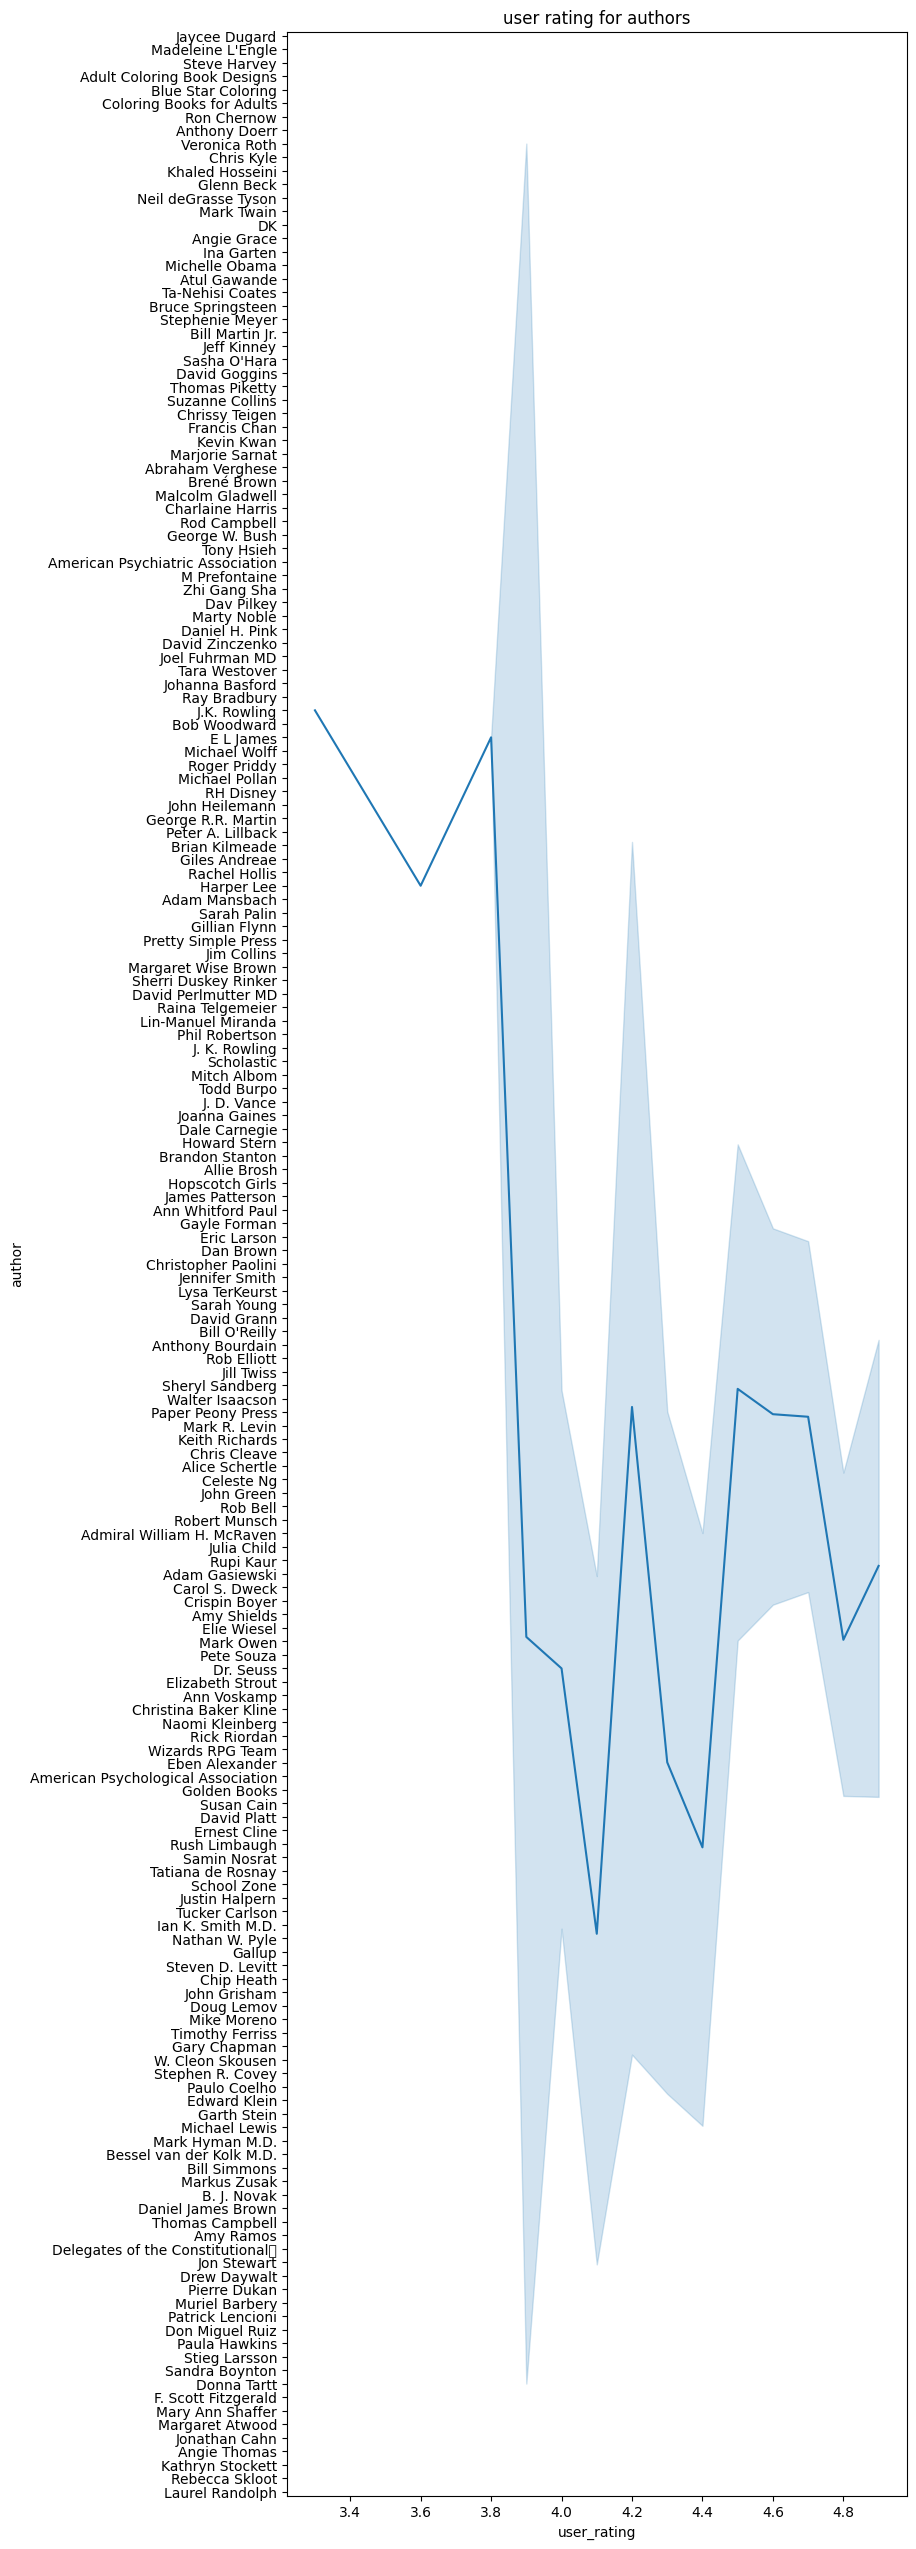

In [38]:
plt.figure(figsize=(8, 32))
sns.lineplot(y='author', x='user_rating', data=df_books)
plt.title('user rating for authors');